In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "etoba.csv"
# Reload the dataset to start fresh
df = pd.read_csv(file_path, encoding="latin1")

# Check for missing values and data types
df.info()

# Display a few rows to examine the data format
df.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Columns: 135 entries, A2:GROUP to J7.5
dtypes: float64(20), int64(17), object(98)
memory usage: 1.4+ MB


,A2:GROUP,B3:AGE,B5:SEX,B6:M-STATUS,B7:EDUCATION,B8:Household Size,C1:TOT_INCOME/A,C2:INCOME/B/FISH,C4:INCOME/B/ALT,D1.1:A_BIKE,...,J6.2,J6.3,J6.4,J6.5,J6.6,J7.1,J7.2,J7.3,J7.4,J7.5
0,BENEFICIARY,33,Male,Married,High School,4-6 members,10K,10K,10K,Wala,...,4.0,5.0,5.0,5.0,5.0,3.0,3.0,5.0,5.0,5.0
1,BENEFICIARY,57,Male,Livedin,High School,4-6 members,10K,10K,10K,Wala,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,BENEFICIARY,45,Male,Married,High School,4-6 members,10K,10K,10K,Wala,...,5.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,BENEFICIARY,32,Male,Single,High School,7-9 members,10K,10K,10K,Wala,...,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
4,BENEFICIARY,38,Male,Single,High School,1-3 members,10K,10K,10K,Wala,...,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,5.0,5.0


In [3]:
#INENCODE LAHAT NG CATEGORICAL DATA

# Apply Label Encoding to all categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for reference

# Save the transformed dataset
encoded_file_path = "D:/Downloads/ojt/etoba_encoded.csv"
df.to_csv(encoded_file_path, index=False)

# Show a preview of the transformed data
print(df.head())


   A2:GROUP  B3:AGE  B5:SEX  B6:M-STATUS  B7:EDUCATION  B8:Household Size  \
0         0      33       1            1             2                  3   
1         0      57       1            0             2                  3   
2         0      45       1            1             2                  3   
3         0      32       1            2             2                  4   
4         0      38       1            2             2                  1   

   C1:TOT_INCOME/A  C2:INCOME/B/FISH  C4:INCOME/B/ALT  D1.1:A_BIKE  ...  J6.2  \
0                1                 2                1            1  ...   4.0   
1                1                 2                1            1  ...   5.0   
2                1                 2                1            1  ...   5.0   
3                1                 2                1            1  ...   1.0   
4                1                 2                1            1  ...   5.0   

   J6.3  J6.4  J6.5  J6.6  J7.1  J7.2  J7.3  J7.4 

In [4]:
#NI-DROP ANG MGA COLUMNS NA MAY 50% NA MISSING VALUES

# Load the dataset
file_path = "D:/Downloads/ojt/etoba_encoded.csv"  # Make sure to use the encoded dataset
df = pd.read_csv(file_path)

# Drop features (columns) with more than 50% missing values
threshold = 0.5 * len(df)  # 50% of the total rows
df = df.dropna(thresh=threshold, axis=1)

# Replace remaining missing values with the mean of their respective column
df = df.fillna(df.mean())

# Save the cleaned dataset
cleaned_file_path = "D:/Downloads/ojt/etoba_cleaned.csv"
df.to_csv(cleaned_file_path, index=False)

# Show a preview of the transformed data
print(df.head())


   A2:GROUP  B3:AGE  B5:SEX  B6:M-STATUS  B7:EDUCATION  B8:Household Size  \
0         0      33       1            1             2                  3   
1         0      57       1            0             2                  3   
2         0      45       1            1             2                  3   
3         0      32       1            2             2                  4   
4         0      38       1            2             2                  1   

   C1:TOT_INCOME/A  C2:INCOME/B/FISH  C4:INCOME/B/ALT  D1.1:A_BIKE  ...  \
0                1                 2                1            1  ...   
1                1                 2                1            1  ...   
2                1                 2                1            1  ...   
3                1                 2                1            1  ...   
4                1                 2                1            1  ...   

   I8.2:FISH_R  I8.3:BOAT_P  I8.4:FISH_COMP  I8.5:OTHERS  NY_W/BOAT  \
0            0 

In [5]:
#NORMALIZE ANG MGA NUMERICAL DATA

# Load the cleaned dataset
file_path = "D:/Downloads/ojt/etoba_cleaned.csv"
df = pd.read_csv(file_path)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to all numerical columns
df[df.columns] = scaler.fit_transform(df[df.columns])

# Save the normalized dataset
normalized_file_path = "D:/Downloads/ojt/etoba_normalized.csv"
df.to_csv(normalized_file_path, index=False)

# Show a preview of the transformed data
print(df.head())



   A2:GROUP    B3:AGE  B5:SEX  B6:M-STATUS  B7:EDUCATION  B8:Household Size  \
0       0.0  0.217391     1.0     0.333333           0.4           0.428571   
1       0.0  0.565217     1.0     0.000000           0.4           0.428571   
2       0.0  0.391304     1.0     0.333333           0.4           0.428571   
3       0.0  0.202899     1.0     0.666667           0.4           0.571429   
4       0.0  0.289855     1.0     0.666667           0.4           0.142857   

   C1:TOT_INCOME/A  C2:INCOME/B/FISH  C4:INCOME/B/ALT  D1.1:A_BIKE  ...  \
0         0.166667          0.333333              0.2          1.0  ...   
1         0.166667          0.333333              0.2          1.0  ...   
2         0.166667          0.333333              0.2          1.0  ...   
3         0.166667          0.333333              0.2          1.0  ...   
4         0.166667          0.333333              0.2          1.0  ...   

   I8.2:FISH_R  I8.3:BOAT_P  I8.4:FISH_COMP  I8.5:OTHERS  NY_W/BOAT  \
0  

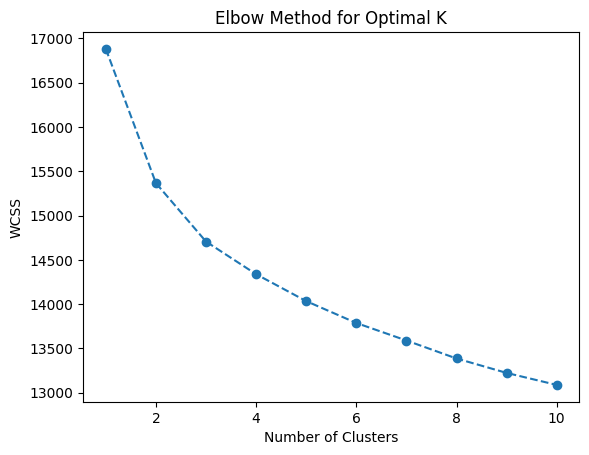

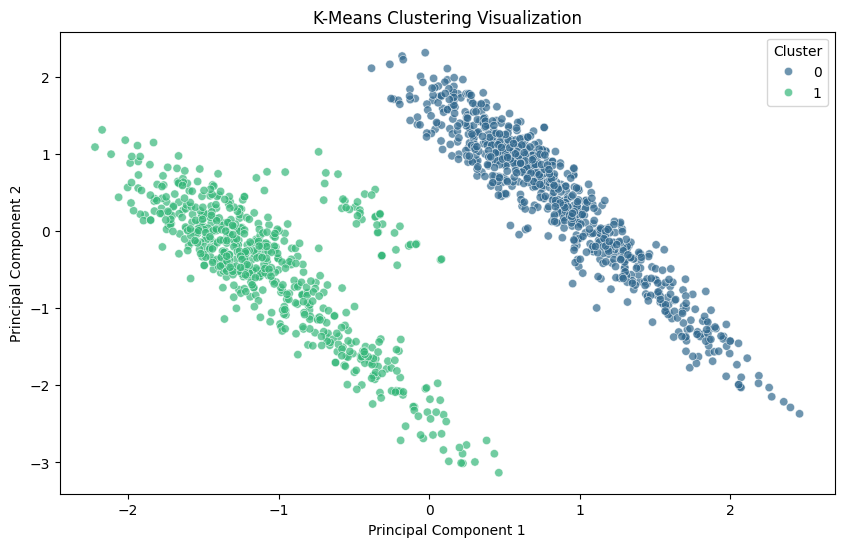

Silhouette Score: 0.1472
Davies-Bouldin Index: 2.3227


In [7]:
#K-MEANS CLUSTERING
from sklearn.decomposition import PCA
# Load the normalized dataset
file_path = "D:/Downloads/ojt/etoba_normalized.csv"
df = pd.read_csv(file_path)

wcss = []
max_clusters = 10  # You can adjust this based on your dataset

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means clustering
k = 2  # Adjust this based on the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

# Reduce dimensions using PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(columns=['Cluster']))  # Exclude cluster column for PCA

df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['PCA1'], y=df['PCA2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title('K-Means Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Assuming `kmeans.labels_` contains the cluster labels
X = df.drop(columns=['Cluster'])
silhouette_avg = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")

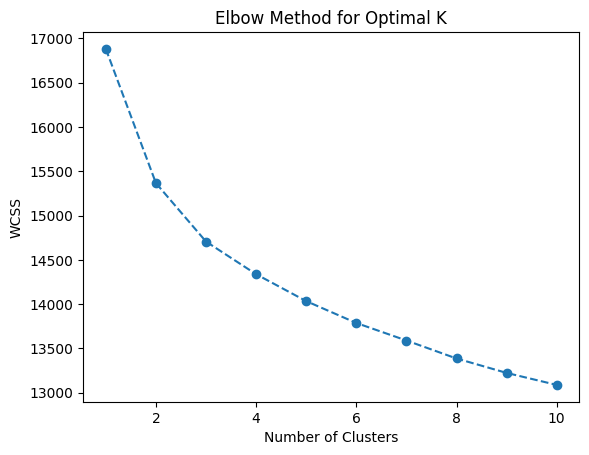

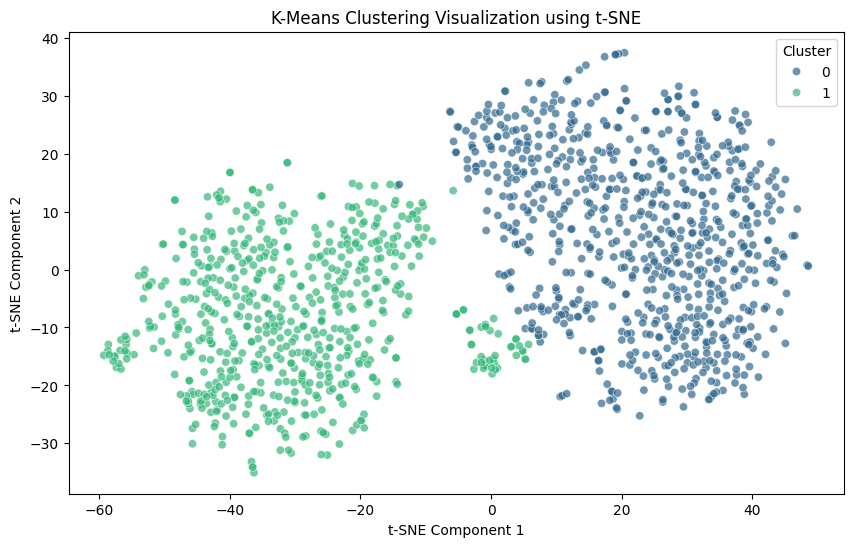

Silhouette Score: 0.5567
Davies-Bouldin Index: 0.6482


In [8]:
#K-MEANS CLUSTERING USING t-SNE
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Load the normalized dataset
file_path = "D:/Downloads/ojt/etoba_normalized.csv"
df = pd.read_csv(file_path)

# Determine optimal number of clusters using the Elbow Method
wcss = []
max_clusters = 10  # You can adjust this based on your dataset

for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

# Apply K-Means clustering
k = 2  # Adjust this based on the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df)

# Reduce dimensions using t-SNE for visualization
tsne = TSNE(n_components=2, random_state=42, perplexity=30)  # Adjust perplexity based on dataset size
tsne_result = tsne.fit_transform(df.drop(columns=['Cluster']))  # Exclude cluster column for t-SNE

df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]

# Plot the clusters using t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TSNE1'], y=df['TSNE2'], hue=df['Cluster'], palette='viridis', alpha=0.7)
plt.title('K-Means Clustering Visualization using t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.show()

# Calculate clustering evaluation metrics
X = df.drop(columns=['Cluster'])
silhouette_avg = silhouette_score(X, kmeans.labels_)
davies_bouldin = davies_bouldin_score(X, kmeans.labels_)

print(f"Silhouette Score: {silhouette_avg:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
